In [2]:
#!/usr/bin/env python

import wuml
import numpy as np
import torch
import wplotlib


#	The idea of training a neural network boils down to 3 steps
#		1. Define a network structure
#			Example: This is a 3 layer network with 100 node width
#				networkStructure=[(100,'relu'),(100,'relu'),(1,'none')]
#				Potential Activation Functions are: softmax, relu, tanh, sigmoid, none
#		2. Define a cost function
#		3. Call train()

data = wuml.wData(xpath='../../data/regress.csv', ypath='../../data/regress_label.csv', batch_size=20, label_type='continuous')

def costFunction(x, y, ŷ, ind):
	ŷ = torch.squeeze(ŷ)
	return torch.sum((y- ŷ) ** 2)	

#	Create network and train
bNet = wuml.basicNetwork(costFunction, data, networkStructure=[(100,'relu'),(100,'relu'),(1,'none')], max_epoch=500, learning_rate=0.001)
bNet.train(print_status=False)
Ŷ = bNet(data, output_type='ndarray')		#Takes Numpy array or Tensor as input and outputs a Tensor


#	Check out our predictions
SR = wuml.summarize_regression_result(data.Y, Ŷ)
print(SR.true_vs_predict())



Network Info:
	Learning rate: 0.001
	Max number of epochs: 500
	Cost Function: <function costFunction at 0x7f4510181680>
	Train Loop Callback: None
	Cuda Available: True
	Network Structure
		Linear(in_features=1, out_features=100, bias=True) , relu
		Linear(in_features=100, out_features=100, bias=True) , relu
		Linear(in_features=100, out_features=1, bias=True) , none

Avg error: 0.5733

['y' 'ŷ']
[1.1  1.11]
[1.1  1.64]
[2.2  1.64]
[1.   2.03]
[2.   2.03]
[3.   2.03]
[2.   2.98]
[3.   2.98]
[4.   2.98]



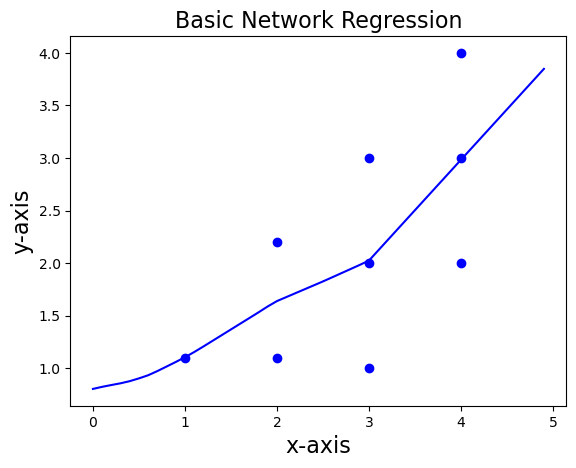

In [3]:
#	Draw the regression line
newX = np.expand_dims(np.arange(0,5,0.1),1)
Ŷline = bNet(newX, output_type='ndarray')		#Takes Numpy array or Tensor as input and outputs a Tensor

#	plot the results out
splot = wplotlib.scatter()
splot.add_plot(data.X, data.Y, marker='o')

lp = wplotlib.lines()	
lp.add_plot(newX, Ŷline)

splot.show(title='Basic Network Regression', xlabel='x-axis', ylabel='y-axis')

